In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# loading the csv file
bs = pd.read_csv(r"C:\Users\Juliane\Documents\GitHub\labs_repo\Final project\bs_clean.csv")
bs.shape

(56981, 15)

In [4]:
bs

,Unnamed: 0,age,sex,underweight,overweight,obese,parents_support,close_friends,students_support,felt_lonely,mean_school_absence,mean_physical_fighting,physically_attacked,cyber_bullied,bullied
0,0,13.0,1.0,NaN,NaN,NaN,5.0,2.0,1.0,5.0,10.0,0.0,0.0,NaN,1
1,1,13.0,1.0,NaN,NaN,NaN,5.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0
2,2,14.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0
3,3,16.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,2.5,0.0,0.0,0
4,4,13.0,1.0,NaN,NaN,NaN,4.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,56976,16.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,0.0,4.5,0.0,0.0,1
56977,56977,16.0,0.0,NaN,NaN,NaN,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0
56978,56978,16.0,0.0,NaN,NaN,NaN,3.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0
56979,56979,16.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,1


In [5]:
bs['age'].value_counts()

14.0    12946
15.0    12812
16.0    11738
13.0    10574
17.0     8227
18.0      383
12.0      145
11.0       48
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

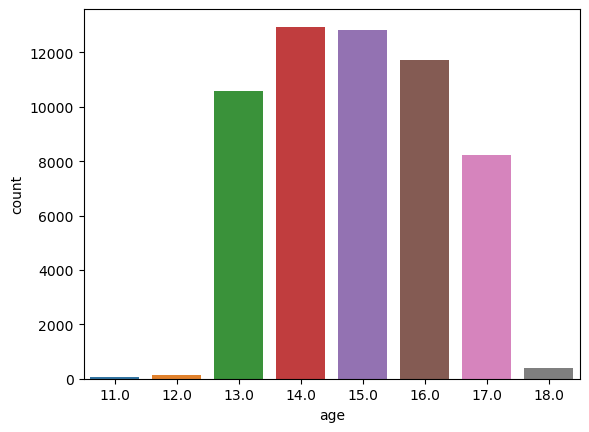

In [6]:
# distribution of age 
sns.countplot(x='age', data=bs)

<Axes: xlabel='age', ylabel='count'>

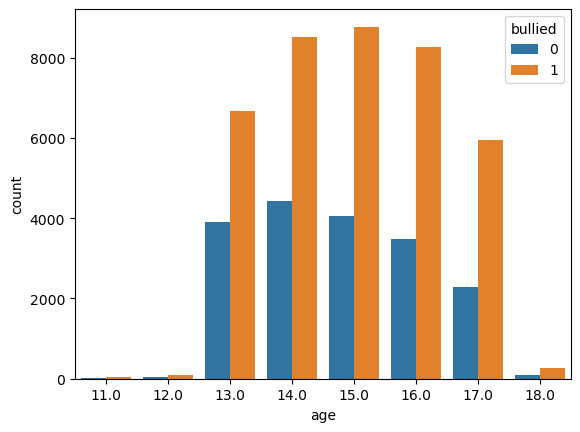

In [7]:
# distribution of age 
sns.countplot(x='age', hue='bullied', data=bs)

([<matplotlib.axis.XTick at 0x20771992710>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

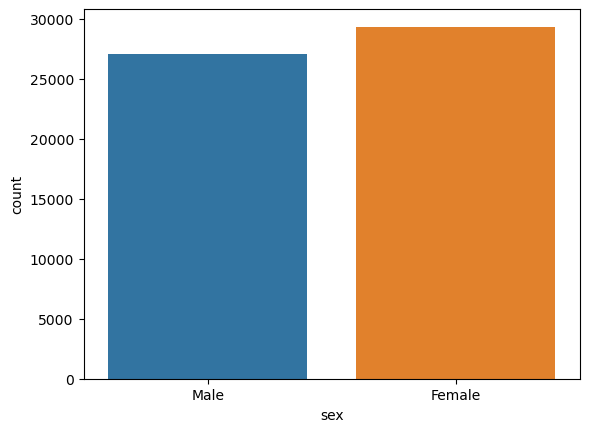

In [8]:
# distribution of students gender
sns.countplot(x='sex', data=bs)
plt.xticks(ticks=[0, 1], labels=['Male','Female'])

In [9]:
# distribution of students gender
bs['sex'].value_counts()

1.0    29362
0.0    27083
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x207719ed210>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

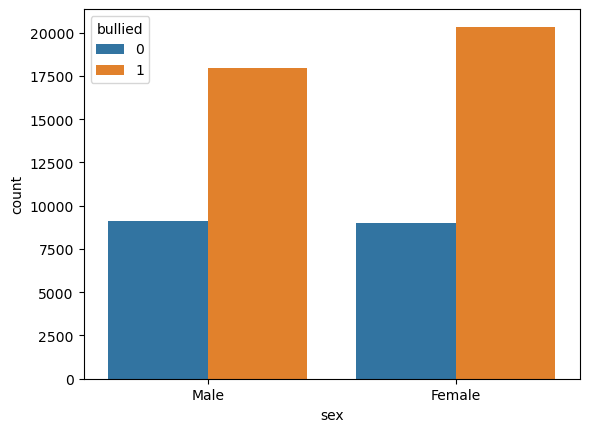

In [10]:
# distribution of students gender
sns.countplot(x='sex', hue='bullied', data=bs)
plt.xticks(ticks=[0, 1], labels=['Male','Female'])

In [11]:
# distribution bullied or not
bs['bullied'].value_counts()

1    38657
0    18324
Name: bullied, dtype: int64

In [12]:
# missing values
bs['bullied'].isna().value_counts()

False    56981
Name: bullied, dtype: int64

([<matplotlib.axis.XTick at 0x20771bab750>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

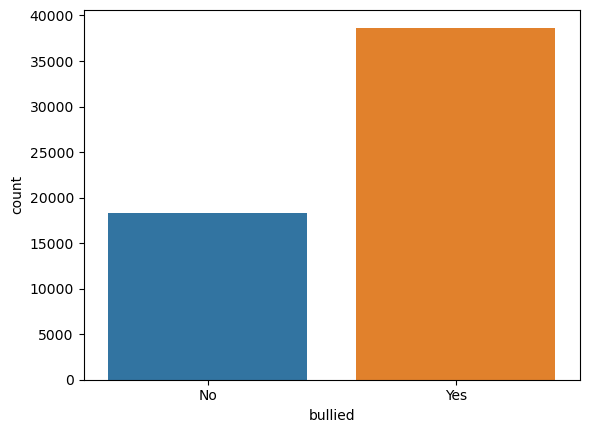

In [13]:
# number of students that have been physically bullied
sns.countplot(x='bullied', data=bs)
plt.xticks(ticks=[0, 1], labels=['No','Yes'])

In [14]:
# distribution of students cyberbullied
bs['cyber_bullied'].value_counts()

0.0    44213
1.0    12197
Name: cyber_bullied, dtype: int64

In [15]:
#missing values
bs['cyber_bullied'].isna().value_counts()

False    56410
True       571
Name: cyber_bullied, dtype: int64

([<matplotlib.axis.XTick at 0x20771c1fe50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

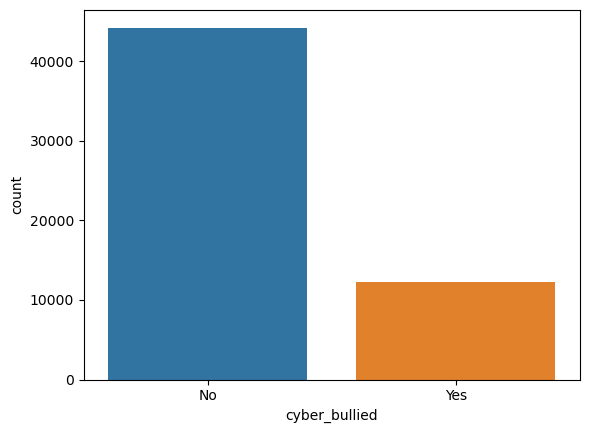

In [16]:
# plot of students that have been cyber bullied
sns.countplot(x='cyber_bullied', data=bs)
plt.xticks(ticks=[0, 1], labels=['No','Yes'])

In [20]:
#distribution cyberbullied in bullied population
cyberbullied = bs.groupby('bullied')[['cyber_bullied']].value_counts()
cyberbullied

bullied  cyber_bullied
0        0.0              18143
1        0.0              26070
         1.0              12197
dtype: int64

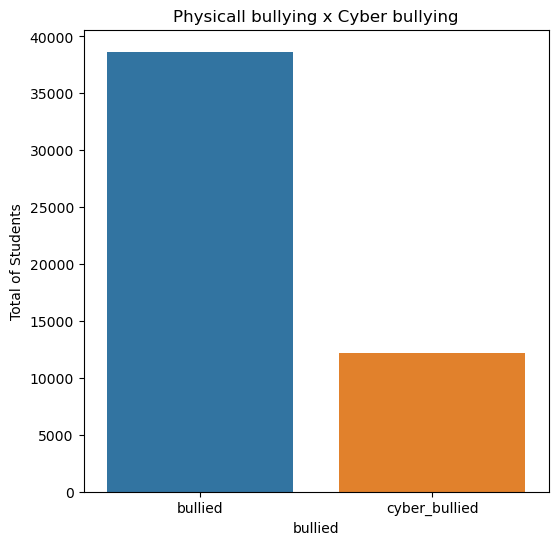

In [17]:
#distribution cyberbullied x bullied 
bs_melted = pd.melt(bs, value_vars=['bullied', 'cyber_bullied'], var_name='bullied')
bs_filtered = bs_melted[bs_melted['value'] == 1]
plt.figure(figsize=(6, 6)) 
sns.countplot(x='bullied', data=bs_filtered)
plt.title('Physicall bullying x Cyber bullying')
plt.ylabel('Total of Students')
plt.show()

In [18]:
#distribution overweight
bs.overweight.value_counts()

0.0    25377
1.0    10675
Name: overweight, dtype: int64

In [19]:
bs.obese.value_counts()

0.0    33397
1.0     2655
Name: obese, dtype: int64

In [21]:
#distribution overweight in bullied population
weight = bs.groupby('bullied')[['overweight']].value_counts()
weight

bullied  overweight
0        0.0            9839
1        0.0           15538
         1.0           10675
dtype: int64

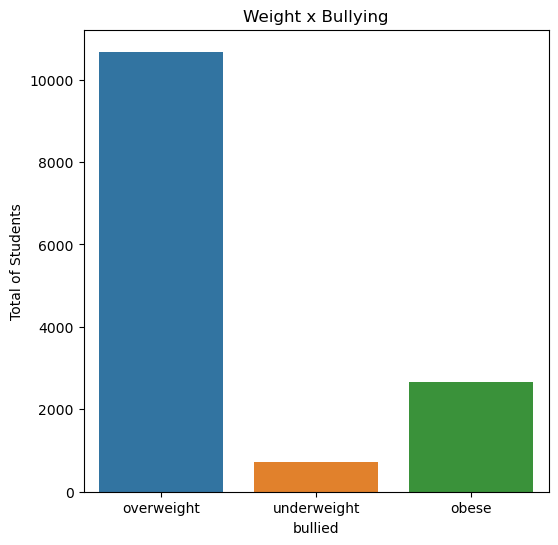

In [32]:
#distribution weight x bullied
bs_melted = pd.melt(bs, value_vars=['overweight', 'underweight', 'obese'], var_name='bullied')
bs_filtered = bs_melted[bs_melted['value'] == 1]
plt.figure(figsize=(6, 6)) 
sns.countplot(x='bullied', data=bs_filtered)
plt.title('Weight x Bullying')
plt.ylabel('Total of Students')
plt.show()

In [33]:
bs.head(1)

,Unnamed: 0,age,sex,underweight,overweight,obese,parents_support,close_friends,students_support,felt_lonely,mean_school_absence,mean_physical_fighting,physically_attacked,cyber_bullied,bullied
0,0,13.0,1.0,NaN,NaN,NaN,5.0,2.0,1.0,5.0,10.0,0.0,0.0,NaN,1


In [35]:
#distribution close_friends in bullied population
friends = bs.groupby('bullied')[['close_friends']].value_counts()
friends

bullied  close_friends
0        3.0              13478
         2.0               2561
         1.0               1221
         0.0                773
1        3.0              25253
         2.0               6550
         1.0               3511
         0.0               2558
dtype: int64

<Axes: xlabel='close_friends', ylabel='count'>

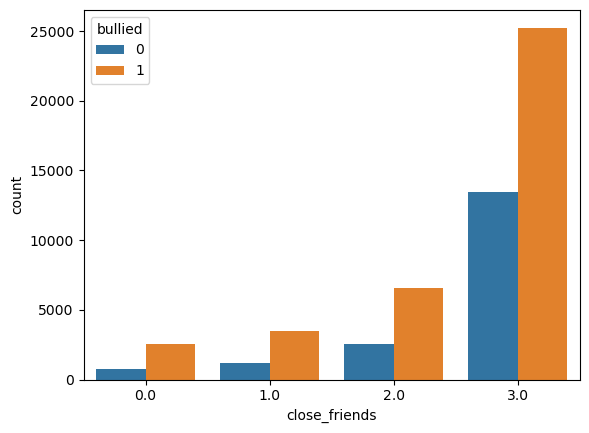

In [22]:
# how many close friends the students have 
sns.countplot(x='close_friends', hue='bullied', data=bs)

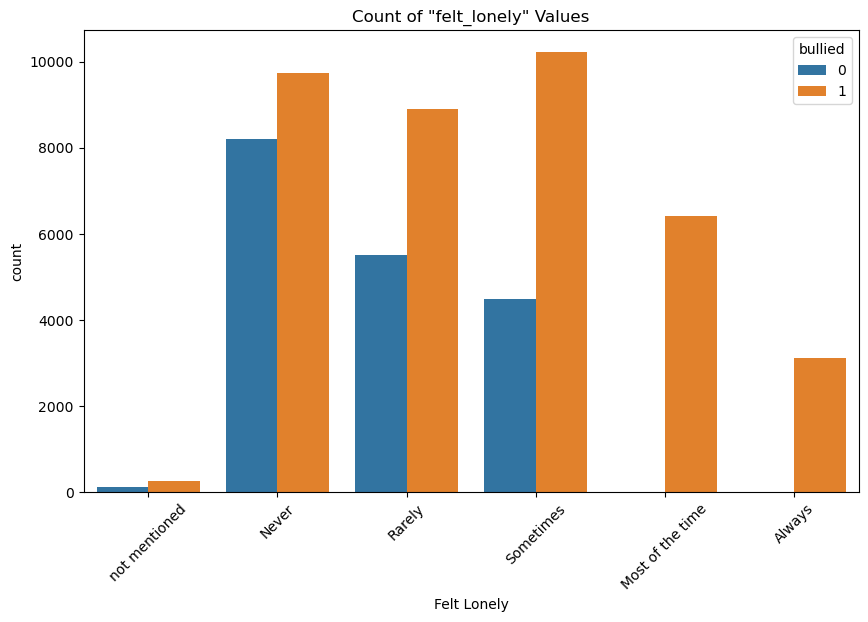

In [24]:
# loneliness
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='felt_lonely', hue= 'bullied', data=bs)
plt.title('Count of "felt_lonely" Values')
plt.xlabel('Felt Lonely')

# Customize x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['not mentioned','Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'])

plt.show()

In [36]:
#distribution loneliness in bullied population
lonely = bs.groupby('bullied')[['felt_lonely']].value_counts()
lonely

bullied  felt_lonely
0        1.0             8196
         2.0             5521
         3.0             4493
         0.0              114
1        3.0            10221
         1.0             9735
         2.0             8906
         4.0             6422
         5.0             3121
         0.0              252
dtype: int64

In [25]:
#distribution parent_support in bullied population
parent_support = bs.groupby('bullied')[['parents_support']].value_counts()
parent_support

bullied  parents_support
0        5.0                5485
         4.0                3478
         1.0                2954
         3.0                2867
         2.0                2611
         0.0                 929
1        1.0                9011
         2.0                7848
         5.0                7587
         3.0                6675
         4.0                6092
         0.0                1444
dtype: int64

In [45]:
bs.parents_support.unique()

array([5., 0., 4., 1., 3., 2.])

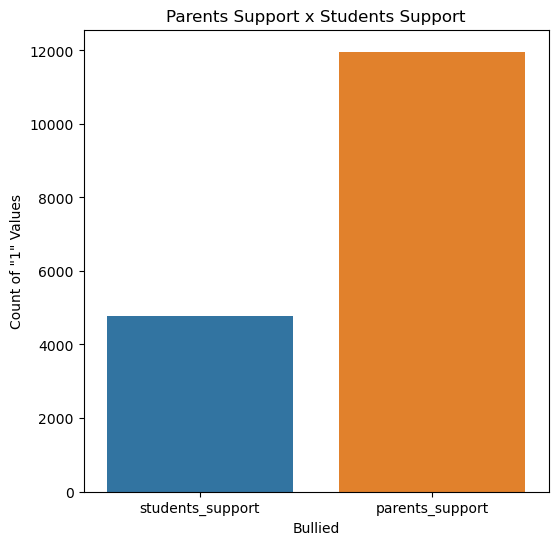

In [26]:
#distribution student_support in bullied population
bs_melted = pd.melt(bs, value_vars=['students_support', 'parents_support'], var_name='Bullied')
bs_filtered = bs_melted[bs_melted['value'] == 1]
plt.figure(figsize=(6, 6)) 
sns.countplot(x='Bullied', data=bs_filtered)
plt.title('Parents Support x Students Support')
plt.ylabel('Count of "1" Values')
plt.show()

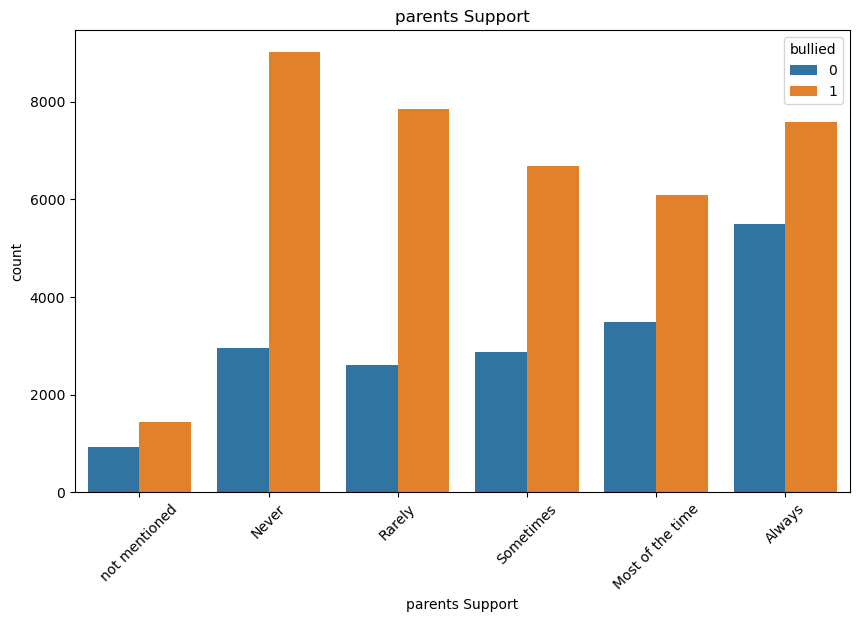

In [46]:
#distribution parent_support in bullied population
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='parents_support', hue= 'bullied', data=bs)
plt.title('parents Support')
plt.xlabel('parents Support')

# Customize x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['not mentioned','Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'])

plt.show()

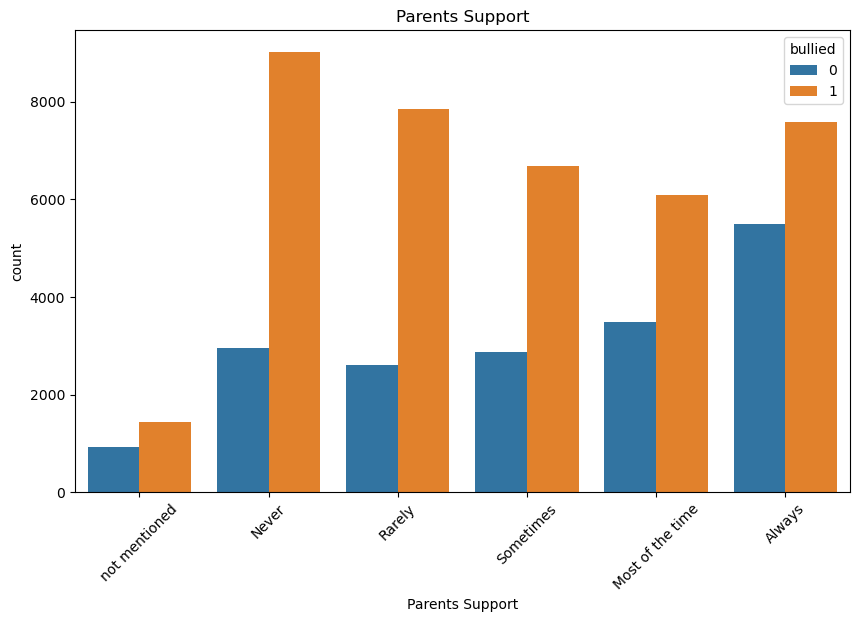

In [23]:
# support from the PARENTS
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='parents_support', hue= 'bullied', data=bs)
plt.title('Parents Support')
plt.xlabel('Parents Support')

# Customize x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['not mentioned','Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'])

plt.show()

In [27]:
#distribution school_absence in bullied population
msa = bs.groupby('bullied')[['mean_school_absence']].value_counts()
msa

bullied  mean_school_absence
0        0.0                    17551
1        0.0                    21103
         1.5                     9739
         4.0                     3925
         10.0                    1468
         7.5                     1331
dtype: int64

In [24]:
#distribution school_absence
bs[['mean_school_absence']].value_counts()

mean_school_absence
0.0                    38654
1.5                     9739
4.0                     3925
10.0                    1468
7.5                     1331
Name: count, dtype: int64

<Axes: xlabel='mean_school_absence', ylabel='count'>

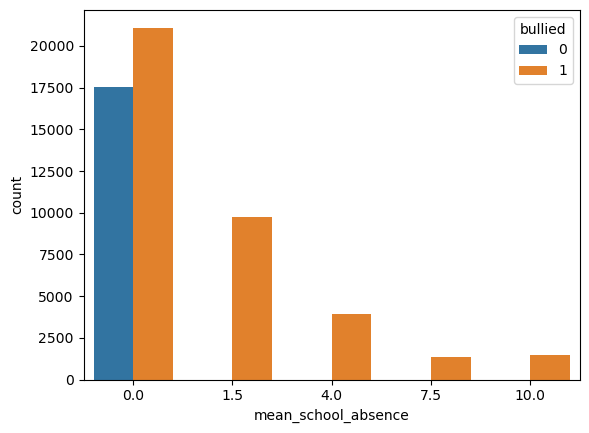

In [25]:
sns.countplot(x='mean_school_absence', hue='bullied', data=bs)

In [28]:
#distribution physical_fighting in bullied population
fighting= bs.groupby('bullied')[['mean_physical_fighting']].value_counts()
fighting

bullied  mean_physical_fighting
0        0.0                       15391
         1.0                        1590
         2.5                         746
         4.5                         182
         12.0                        179
         6.5                          74
         8.5                          59
         10.5                         25
1        0.0                       27855
         1.0                        5342
         2.5                        2904
         4.5                         846
         12.0                        760
         6.5                         415
         8.5                         205
         10.5                        140
dtype: int64

In [30]:
#distribution physically_attacked in bullied population
attacked = bs.groupby('bullied')[['physically_attacked']].value_counts()
attacked 

bullied  physically_attacked
0        0.0                    16816
         1.0                      938
         2.0                      294
         12.0                      86
         4.0                       65
         6.0                       35
         8.0                       16
         10.0                       8
1        0.0                    30181
         1.0                     4310
         2.0                     2111
         12.0                     704
         4.0                      630
         6.0                      267
         8.0                      173
         10.0                     107
dtype: int64

In [31]:
bs[['physically_attacked']].value_counts()

physically_attacked
0.0                    46997
1.0                     5248
2.0                     2405
12.0                     790
4.0                      695
6.0                      302
8.0                      189
10.0                     115
dtype: int64

<Axes: xlabel='physically_attacked', ylabel='count'>

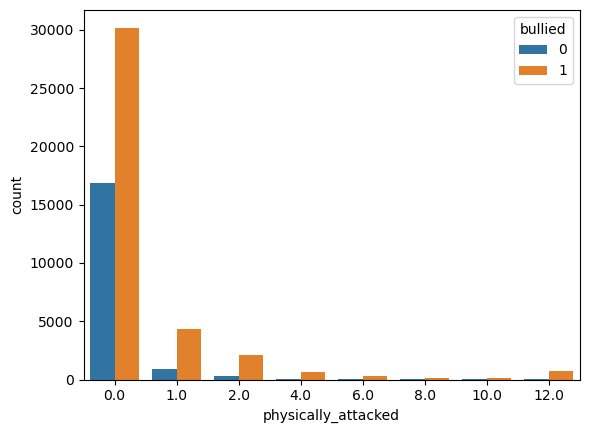

In [32]:
sns.countplot(x='physically_attacked', hue='bullied', data=bs)

In [33]:
corr_matrix = bs.corr()
corr_matrix

,Unnamed: 0,age,sex,underweight,overweight,obese,parents_support,close_friends,students_support,felt_lonely,mean_school_absence,mean_physical_fighting,physically_attacked,cyber_bullied,bullied
Unnamed: 0,1.000000,0.002409,0.008022,-0.012933,0.024960,0.000392,0.008943,-0.012819,0.004867,-0.018718,-0.003028,-0.001923,-0.011308,-0.008234,-0.004416
age,0.002409,1.000000,-0.008346,-0.018400,-0.087042,-0.032627,-0.038814,-0.058494,0.011429,0.093204,0.106945,-0.001980,-0.013786,0.037475,0.065230
sex,0.008022,-0.008346,1.000000,-0.028163,-0.092783,-0.071123,-0.023080,-0.053861,-0.012491,0.263142,-0.028545,-0.147961,-0.033406,0.137616,0.032494
underweight,-0.012933,-0.018400,-0.028163,1.000000,-0.093435,-0.040619,-0.004725,-0.003890,-0.009477,-0.006773,-0.005163,0.002153,0.011377,-0.004376,0.088260
overweight,0.024960,-0.087042,-0.092783,-0.093435,1.000000,0.434725,0.007599,-0.007329,-0.007815,-0.028756,0.013034,0.025502,0.021309,-0.015097,0.397357
obese,0.000392,-0.032627,-0.071123,-0.040619,0.434725,1.000000,0.004315,-0.009603,-0.016943,-0.010201,0.014567,0.021424,0.024671,-0.012273,0.172741
parents_support,0.008943,-0.038814,-0.023080,-0.004725,0.007599,0.004315,1.000000,0.119932,0.314849,-0.234620,-0.081928,-0.070298,-0.089236,-0.082669,-0.119575
close_friends,-0.012819,-0.058494,-0.053861,-0.003890,-0.007329,-0.009603,0.119932,1.000000,0.163024,-0.179430,-0.021432,-0.008257,-0.046864,-0.052143,-0.082196
students_support,0.004867,0.011429,-0.012491,-0.009477,-0.007815,-0.016943,0.314849,0.163024,1.000000,-0.135775,-0.054942,-0.056276,-0.080757,-0.076017,-0.092976
felt_lonely,-0.018718,0.093204,0.263142,-0.006773,-0.028756,-0.010201,-0.234620,-0.179430,-0.135775,1.000000,0.066880,0.041564,0.147074,0.226648,0.306954


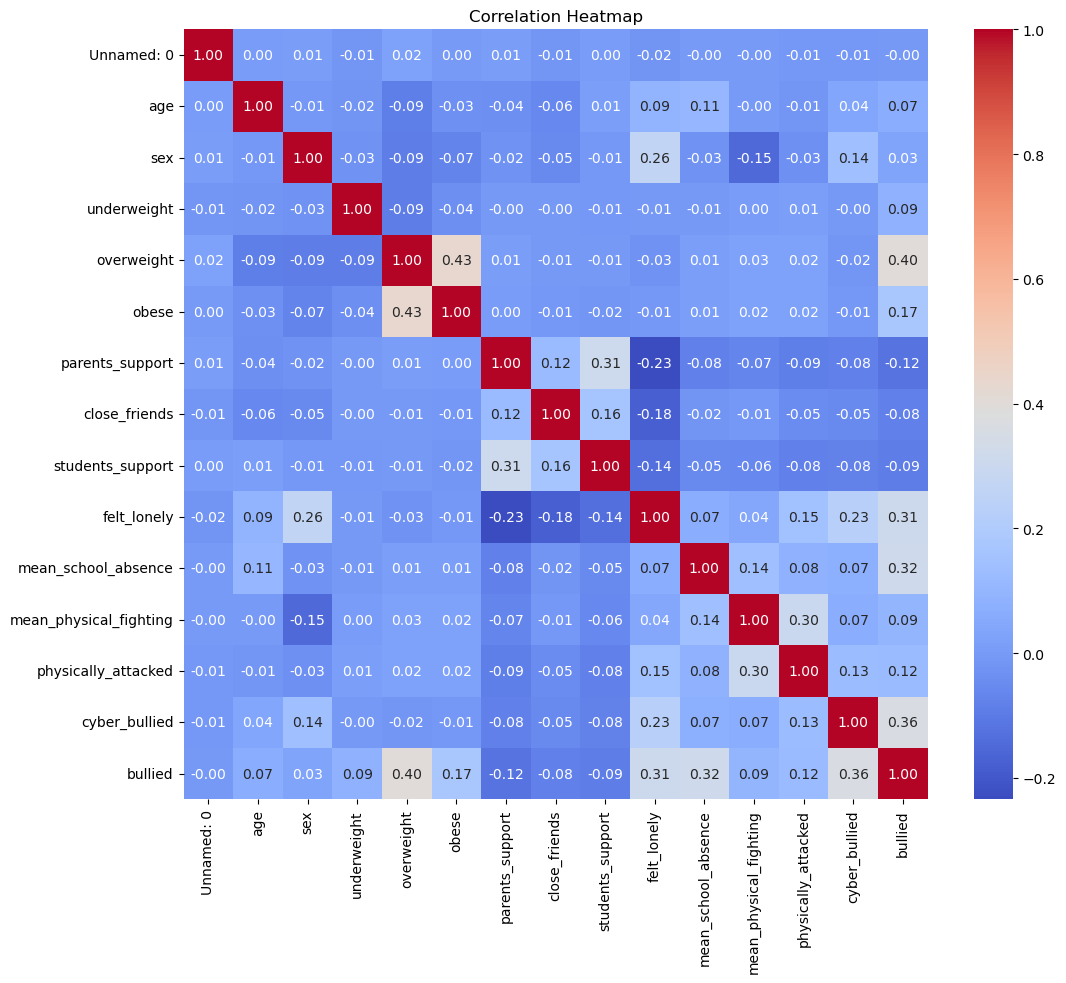

In [34]:
plt.figure(figsize=(12, 10))  # Adjust the figsize according to your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

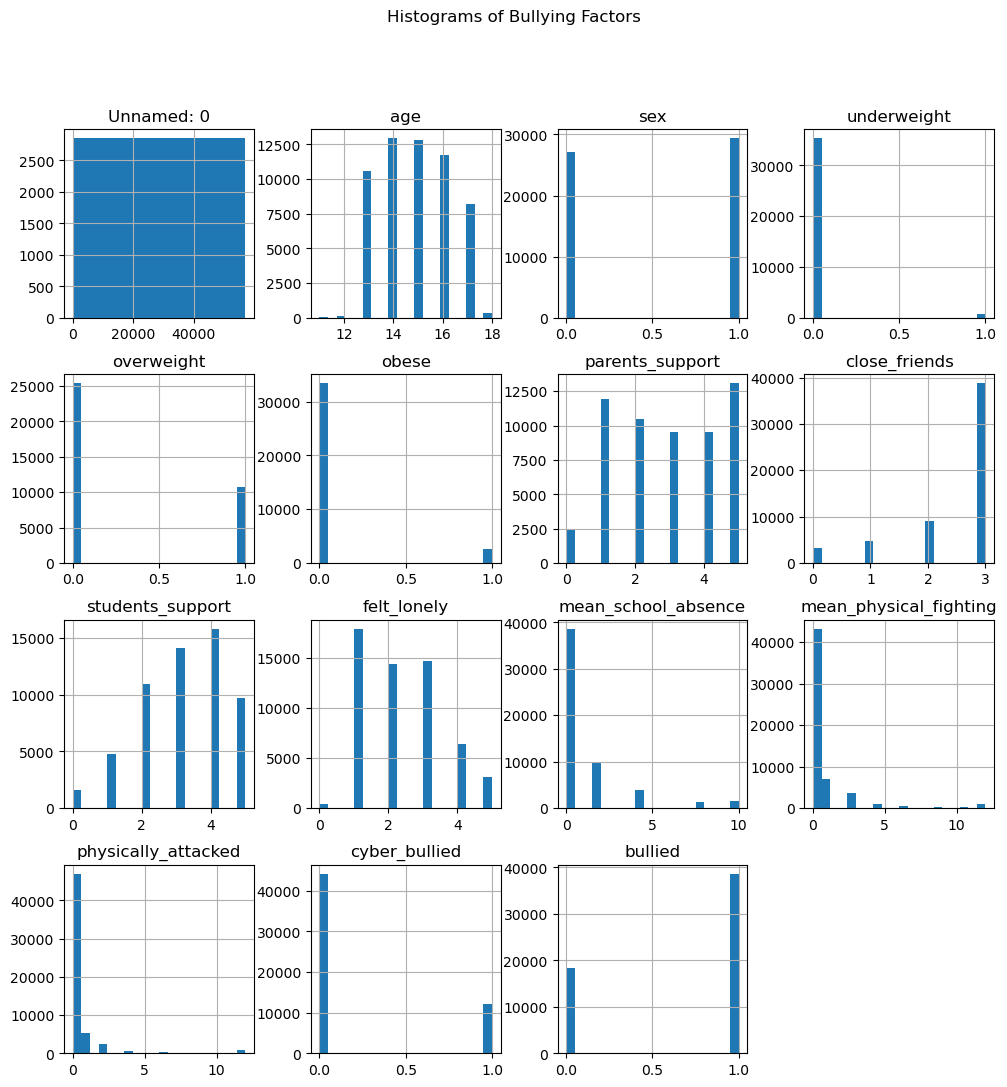

In [35]:
bs.hist(figsize=(12, 12), bins=20)
plt.suptitle('Histograms of Bullying Factors', y=0.98)
plt.show()